# Explore the word dictionaries

In [1]:
import os
import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from string import ascii_lowercase

base_path = ".."
data_path = os.path.join(base_path, "data")

## Words from Google Web Trillion Word Corpus

Load the words from the [Google Web Trillion Word Corpus](https://www.kaggle.com/rtatman/english-word-frequency) and add a `freq` field to measure frequency of words -- more useful than pure counts.

In [2]:
data = pd.read_csv(os.path.join(data_path, "unigram_freq.csv"))
data["freq"] = data["count"] / data["count"].sum()
data

,word,count,freq
0,the,23135851162,3.933838e-02
1,of,13151942776,2.236253e-02
2,and,12997637966,2.210016e-02
3,to,12136980858,2.063676e-02
4,a,9081174698,1.544091e-02
...,...,...,...
333328,gooek,12711,2.161278e-08
333329,gooddg,12711,2.161278e-08
333330,gooblle,12711,2.161278e-08
333331,gollgo,12711,2.161278e-08


Let's see how many words we have of length 5.

In [3]:
five_word = data[data["word"].str.len() == 5]
five_word

,word,count,freq
35,about,1226734006,2.085842e-03
45,other,978481319,1.663732e-03
56,which,810514085,1.378134e-03
57,their,782849411,1.331095e-03
62,there,701170205,1.192214e-03
...,...,...,...
333307,goovo,12711,2.161278e-08
333308,goova,12711,2.161278e-08
333320,goolh,12711,2.161278e-08
333328,gooek,12711,2.161278e-08


Those rare words at the bottom are pure nonsense. Let's find a frequency threshold that leads to reasonable words.

In [4]:
five_word[five_word["freq"] > 1e-3]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192


In [5]:
five_word[five_word["freq"] > 1e-7]

,word,count,freq
35,about,1226734006,2.085842e-03
45,other,978481319,1.663732e-03
56,which,810514085,1.378134e-03
57,their,782849411,1.331095e-03
62,there,701170205,1.192214e-03
...,...,...,...
135370,broer,58833,1.000350e-07
135373,horak,58831,1.000316e-07
135383,charo,58827,1.000248e-07
135385,knive,58824,1.000197e-07


In [6]:
five_word[five_word["freq"] > 1e-4]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
1366,award,59652161,0.000101
1369,peter,59541743,0.000101
1377,extra,59377307,0.000101
1380,pussy,59206591,0.000101


In [7]:
five_word[five_word["freq"] > 1e-6]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
35873,mauve,589931,0.000001
35892,spore,589081,0.000001
35897,tessa,588993,0.000001
35903,crept,588735,0.000001


In [8]:
five_word[five_word["freq"] > 1e-5]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
9026,shark,5904454,0.000010
9034,grows,5899321,0.000010
9035,cliff,5898886,0.000010
9037,tract,5897046,0.000010


In [9]:
five_word[five_word["freq"] > 0.4e-5]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
15882,tenor,2361385,0.000004
15887,scrub,2360299,0.000004
15892,cello,2358848,0.000004
15904,caves,2355316,0.000004


This last one seems pretty reasonable for 5-letter word. Let's see if it works well-enough for general words, too.

In [10]:
data[data["freq"] > 0.4e-5]

,word,count,freq
0,the,23135851162,0.039338
1,of,13151942776,0.022363
2,and,12997637966,0.022100
3,to,12136980858,0.020637
4,a,9081174698,0.015441
...,...,...,...
15912,aiming,2353915,0.000004
15913,seizure,2353392,0.000004
15914,stuttgart,2353387,0.000004
15915,diplomacy,2352610,0.000004


Not bad.

Let's make sure all these words are made up of only letters.

In [11]:
data["word"].str.isalpha().all()

True

How do we select a random word?

In [12]:
data["word"].sample(random_state=0).iloc[0]

'saltbox'

How do we choose a different random number generator?

In [13]:
print(data["word"].sample(random_state=1).iloc[0])
print(data["word"].sample(random_state=1).iloc[0])

brests
brests


In [14]:
data["word"].sample(random_state=np.random.default_rng(1)).iloc[0]

'higa'

## Words from our chosen dictionary

In [15]:
db = pd.read_csv(os.path.join(data_path, "dictionary.csv"))

In [16]:
db

,word,count,freq
0,the,2.313585e+10,0.039338
1,of,1.315194e+10,0.022363
2,and,1.299764e+10,0.022100
3,to,1.213698e+10,0.020637
4,in,8.469405e+09,0.014401
...,...,...,...
279493,zythum,NaN,NaN
279494,zythums,NaN,NaN
279495,zyzzyva,NaN,NaN
279496,zyzzyvas,NaN,NaN


### Let's look at some stats

In [17]:
db_five = db[db.word.str.len() == 5]

In [18]:
db_five

,word,count,freq
33,about,1.226734e+09,0.002086
43,other,9.784813e+08,0.001664
54,which,8.105141e+08,0.001378
55,their,7.828494e+08,0.001331
60,there,7.011702e+08,0.001192
...,...,...,...
279356,zowee,NaN,NaN
279378,zupas,NaN,NaN
279381,zurfs,NaN,NaN
279383,zuzim,NaN,NaN


In [19]:
letter_counts = [np.zeros(len(ascii_lowercase)) for _ in range(5)]
letter_freq = [np.zeros(len(ascii_lowercase)) for _ in range(5)]
for i in range(5):
    crt_slice = db_five["word"].str.slice(i, i + 1)
    for k, ch in enumerate(ascii_lowercase):
        letter_counts[i][k] = (crt_slice == ch).sum()
    
    letter_freq[i] = letter_counts[i] / np.sum(letter_counts[i])

All the positions are rather different, with the first one perhaps being the most diverse.

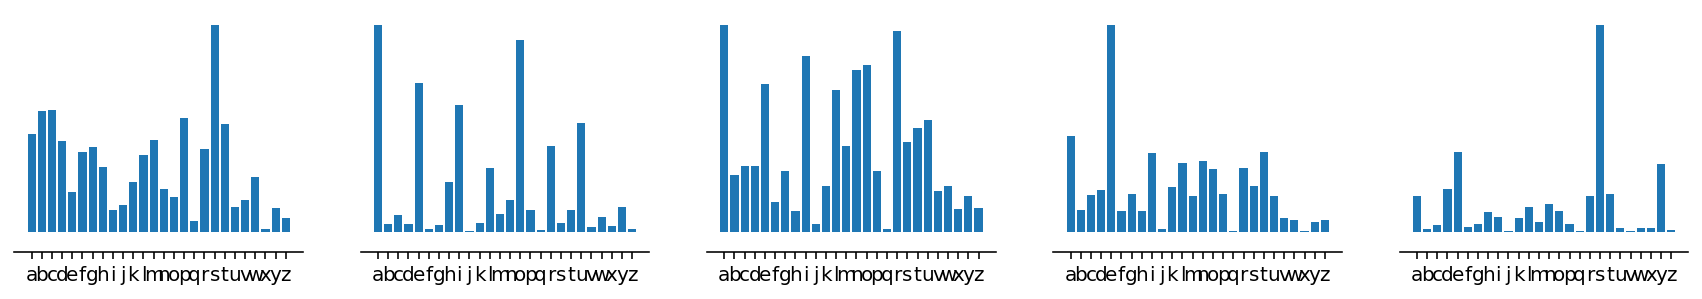

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(15, 2))
for i, ax in enumerate(axs):
    ax.bar(np.arange(len(ascii_lowercase)), letter_freq[i])
    ax.set_xticks(np.arange(len(ascii_lowercase)))
    ax.set_xticklabels(ascii_lowercase)
    ax.set_yticks([])
    sns.despine(ax=ax, left=True, offset=10)

Overall letter frequency.

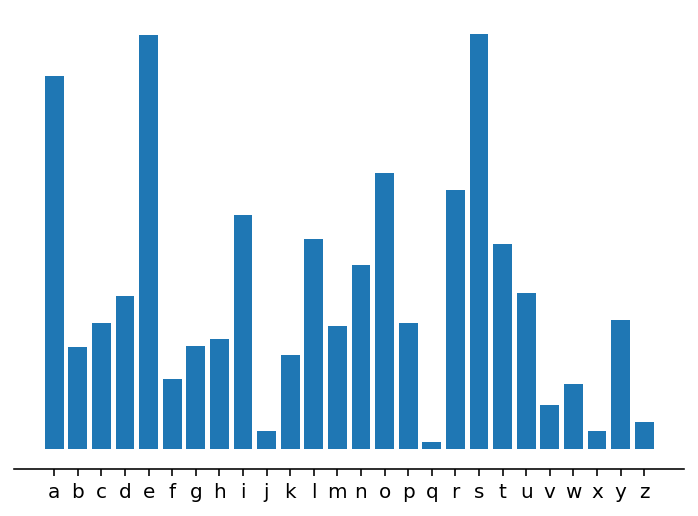

In [21]:
fig, ax = plt.subplots()
overall_freq = np.mean(letter_freq, axis=0)
ax.bar(np.arange(len(ascii_lowercase)), overall_freq)
ax.set_xticks(np.arange(len(ascii_lowercase)))
ax.set_xticklabels(ascii_lowercase)
ax.set_yticks([])
sns.despine(ax=ax, left=True, offset=10)

Most common letters by position:

In [22]:
[ascii_lowercase[np.argmax(letter_freq[_])] for _ in range(5)]

['s', 'a', 'a', 'e', 's']

10 most common letters overall:

In [23]:
{ascii_lowercase[_]: overall_freq[_] for _ in np.argsort(overall_freq)[::-1][:10]}

{'s': 0.10275979031760715,
 'e': 0.10271353684859699,
 'a': 0.09235275979031762,
 'o': 0.06842429848905333,
 'r': 0.0641073080481036,
 'i': 0.05795559666975023,
 'l': 0.05197348134443417,
 't': 0.05080172679617638,
 'n': 0.04551341350601294,
 'u': 0.03871415356151712}

This suggests that `raise` would be a good starting word. It contains all of the most common letters at each position (though not matching that position); and it contains 5 out of the 6 most common letters overall.

### Find the most informative first word

That is, find the word that leads to the greatest reduction in the number of remaining possibilities.

We need to precalculate some things to make this feasible.

In [24]:
# assume that only the highest-frequency words can be target words
db_target = db_five.sort_values("freq", ascending=False).iloc[:3000]

In [25]:
db_target

,word,count,freq
33,about,1.226734e+09,2.085842e-03
43,other,9.784813e+08,1.663732e-03
54,which,8.105141e+08,1.378134e-03
55,their,7.828494e+08,1.331095e-03
60,there,7.011702e+08,1.192214e-03
...,...,...,...
25361,mauve,5.899310e+05,1.003072e-06
25375,spore,5.890810e+05,1.001627e-06
25380,crept,5.887350e+05,1.001039e-06
25421,canna,5.861920e+05,9.967146e-07


In [26]:
n0 = len(db_five)

# write the words in a 5-column matrix to improve access speed
word_matrix = np.empty((n0, 5), dtype="S1")
for j in range(5):
    word_matrix[:, j] = db_five.word.str.slice(j, j + 1)

# generate masks for all the words that *do* contain a given letter
contained_masks = {}
for ch in tqdm.tqdm(ascii_lowercase):
    crt_mask = np.zeros(n0, dtype=bool)
    bch = bytes(ch, "utf8")
    for j in range(5):
        crt_mask = crt_mask | (word_matrix[:, j] == bch)
    
    contained_masks[ch] = crt_mask

# generate masks for all the words that *do not* contain a given letter
not_contained_masks = {}
for ch in tqdm.tqdm(ascii_lowercase):
    crt_mask = np.ones(n0, dtype=bool)
    bch = bytes(ch, 'utf8')
    for j in range(5):
        crt_mask = crt_mask & (word_matrix[:, j] != bch)
    
    not_contained_masks[ch] = crt_mask

100%|██████████| 26/26 [00:00<00:00, 1207.78it/s]


In [27]:
crt_words = db_five.word
crt_target_words = db_target.word

n1 = len(crt_target_words)
d_entropy = np.zeros((n0, n1))
for i, word in enumerate(tqdm.tqdm(crt_words)):
    # for every possible target, check how much the entropy is reduced by trying `word`
    remaining = np.zeros(n1, dtype=int)
    for j, target in enumerate(crt_target_words):
        # start out with a mask that's all true
        mask = np.ones(n0, dtype=bool)

        # restrict by exact matches
        exact_matches = ""
        for k, (ch1, ch2) in enumerate(zip(word, target)):
            if ch1 == ch2:
                crt_mask = word_matrix[:, k] == bytes(ch1, "utf-8")
                mask = mask & crt_mask
                exact_matches += ch1
        
        # remove words with letters that we know are not in the target
        for ch in set(word) - set(target):
            mask = mask & not_contained_masks[ch]

        # remove words that don't contain the letters we know should be contained
        # no point in testing the exact matches again, though
        for ch in (set(word) & set(target)) - set(exact_matches):
            mask = mask & contained_masks[ch]

        remaining[j] = mask.sum()

    crt_d_entropy = np.log2(n0 / remaining)

    d_entropy[i, :] = crt_d_entropy

100%|██████████| 12972/12972 [1:13:08<00:00,  2.96it/s]  


In [28]:
mean_d_entropy = np.mean(d_entropy, axis=1)
median_d_entropy = np.median(d_entropy, axis=1)
min_d_entropy = np.min(d_entropy, axis=1)

In [29]:
mapping = {"mean": mean_d_entropy, "median": median_d_entropy, "min": min_d_entropy}
n_top = 5
for key in mapping:
    crt_d_entropy = mapping[key]
    crt_sorting = np.argsort(-crt_d_entropy)
    crt_top_words = db_five.word.iloc[crt_sorting[:n_top]]
    crt_top_words_str = ", ".join(crt_top_words)
    print(f"Best words by {key} entropy: {crt_top_words_str}.")

Best words by mean entropy: tears, soare, stare, reast, slate.
Best words by median entropy: stoae, tears, strae, soare, tares.
Best words by min entropy: serai, arise, aesir, raise, reais.


## Try to find a group of five words with all distinct letters

In [30]:
no_repeated_letter_mask = np.ones(n0, dtype=bool)
for i_word in range(n0):
    word = db_five.word.iloc[i_word]
    if len(set(word)) != 5:
        no_repeated_letter_mask[i_word] = False

In [31]:
np.sum(no_repeated_letter_mask)

8322

In [32]:
four_word_groups = []
for i_word1 in tqdm.tqdm(range(n0)):
    if not no_repeated_letter_mask[i_word1]:
        continue

    word1 = db_five.word.iloc[i_word1]
    mask1 = no_repeated_letter_mask & (np.arange(n0) > i_word1)
    for ch in word1:
        mask1 &= not_contained_masks[ch]
    
    idxs2 = mask1.nonzero()[0]
    if len(idxs2) == 0:
        continue

    for i_word2 in idxs2:
        word2 = db_five.word.iloc[i_word2]
        mask2 = mask1 & (np.arange(n0) > i_word2)
        for ch in word2:
            mask2 &= not_contained_masks[ch]
        
        idxs3 = mask2.nonzero()[0]
        if len(idxs3) == 0:
            continue

        for i_word3 in idxs3:
            word3 = db_five.word.iloc[i_word3]
            mask3 = mask2 & (np.arange(n0) > i_word3)
            for ch in word3:
                mask3 &= not_contained_masks[ch]
            
            idxs4 = mask3.nonzero()[0]
            if len(idxs4) == 0:
                continue

            for i_word4 in idxs4:
                word4 = db_five.word.iloc[i_word4]

                four_word_groups.append((word1, word2, word3, word4))

                mask4 = mask3 & (np.arange(n0) > i_word4)
                for ch in word4:
                    mask4 &= not_contained_masks[ch]
                
                idxs5 = mask4.nonzero()[0]
                if len(idxs5) == 0:
                    continue

                for i_word5 in idxs5:
                    word5 = db_five.word.iloc[i_word5]
                    print(f"[{word1}, {word2}, {word3}, {word4}, {word5}]")

  7%|▋         | 962/12972 [31:07<5:33:46,  1.67s/it] 

[brick, jumpy, glent, vozhd, waqfs]


 13%|█▎        | 1733/12972 [51:55<10:52:55,  3.49s/it]

[chunk, waltz, fjord, gymps, vibex]


 15%|█▌        | 1986/12972 [59:34<4:37:28,  1.52s/it] 

[waltz, nymph, fjord, gucks, vibex]


 16%|█▌        | 2031/12972 [1:00:24<1:32:33,  1.97it/s]

[bling, jumpy, treck, vozhd, waqfs]


 20%|█▉        | 2571/12972 [1:14:45<10:17:58,  3.56s/it]

[prick, jumby, glent, vozhd, waqfs]


 40%|███▉      | 5153/12972 [1:58:43<1:22:47,  1.57it/s] 

[pling, treck, jumby, vozhd, waqfs]


 45%|████▍     | 5799/12972 [2:04:46<1:14:11,  1.61it/s]

[clunk, bemix, grypt, vozhd, waqfs]


 54%|█████▍    | 7019/12972 [2:13:33<55:09,  1.80it/s]  

[brung, kempt, cylix, vozhd, waqfs]
[brung, kempt, vozhd, waqfs, xylic]


 55%|█████▍    | 7091/12972 [2:13:54<26:51,  3.65it/s]  

[blunk, cimex, grypt, vozhd, waqfs]


 58%|█████▊    | 7500/12972 [2:16:10<13:16,  6.87it/s]  

[jumby, clipt, kreng, vozhd, waqfs]


100%|██████████| 12972/12972 [2:41:48<00:00,  1.34it/s]  
